<a href="https://colab.research.google.com/github/Podushka228/MiTMOvPZ/blob/main/Zadanie_7_%D0%AF%D0%BC%D1%89%D0%B8%D0%BA%D0%BE%D0%B2_%D0%9C%D0%B8%D1%85%D0%B0%D0%B8%D0%BB_6015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1

1. Напишите "наивную" рекуррентную функцию вычисления n-го [числа Фибоначчи](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%B0_%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8). То есть функция которая для вычисления предыдущих чисел Фибоначчи просто вызывает саму себя.
2. Напишите рекуррентную функцию вычисления списка чисел Фибоначчи (от 0-го до n-го) по данному n
3. C помощью Timer и matplotlib нарисуйте график роста времени работы этих функций по мере увеличения n.


In [69]:
import math
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [70]:
def fibonacci(n):
    if (n <= 1):
        return n
    else:
        return (fibonacci(n-1) + fibonacci(n-2))

In [71]:
for i in range(1,15): print(fibonacci(i), end=" ")

1 1 2 3 5 8 13 21 34 55 89 144 233 377 

In [72]:
def Fibonacci(n):
    if n == 0:
        return [0]
    elif n == 1:
        return [0, 1]
    else:
        Fib = Fibonacci(n-1)
        Fib.append(Fib[-1] + Fib[-2])
        return Fib

In [73]:
Fibonacci(15)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

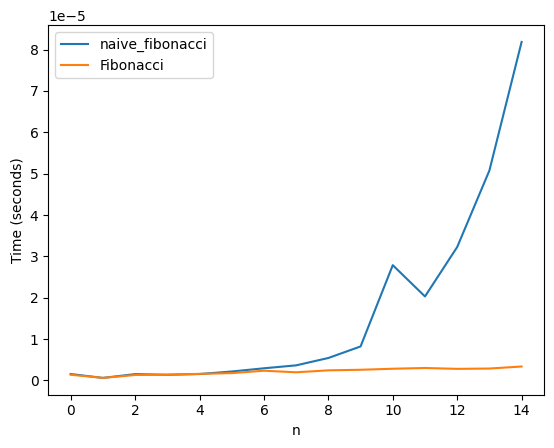

In [74]:
import timeit
import matplotlib.pyplot as plt

n_values = list(range(15))

# Измеряем время работы наивной рекуррентной функции и функции вычисления списка
naive_times = []
times = []

for n in n_values:
    # Измеряем время работы наивной рекуррентной функции
    naive_time = timeit.timeit(lambda: fibonacci(n), number=1)
    naive_times.append(naive_time)

    # Измеряем время работы функции вычисления списка
    time = timeit.timeit(lambda: Fibonacci(n), number=1)
    times.append(time)

# Строим графики
plt.plot(n_values, naive_times, label='naive_fibonacci')
plt.plot(n_values, times, label='Fibonacci')
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

## Задание 2
Напишите генератор бесконечной последовательности чисел Фибоначчи начиная с 0-го.

In [75]:
def fibonacci_Generator():
    a,b = 0,1
    while True:
        yield b
        a,b= b,a+b

In [76]:
fib = fibonacci_Generator()

In [77]:
next(fib)

1

In [78]:
next(fib)

1

In [79]:
next(fib)

2

In [80]:
next(fib)

3

In [81]:
next(fib)

5

In [82]:
next(fib)

8

In [83]:
next(fib)

13

## Задание 3

1. с помощью Timer напишите функцию высшего порядка `my_timeit(foo)`, результат которой - функция подсчёта времени работы foo для разных входных значений, и которую можно подать на вход `plot_discrete`
2. Задекорируйте рекурсивную функцию fib из задания 1.1 для кеширования результатов, сравните как изменилось время работы с помощью `plot_discrete(my_timeit(...)))`

In [84]:
import time

In [85]:
def my_timeit(foo):
  def timed(*args, **kwargs):
        timer = timeit.Timer(lambda: foo(*args, **kwargs))
        elapsed_time = timer.timeit(1)
        return elapsed_time

  timed.__name__ = foo.__name__
  return timed

In [86]:
def plot_discrete(foo, values=range(1,25)):
  y = [foo(x) for x in values]
  plt.scatter(values, y)
  plt.plot(values, y, label=foo.__name__)
  plt.xlabel('n')
  plt.ylabel('Time (seconds)')

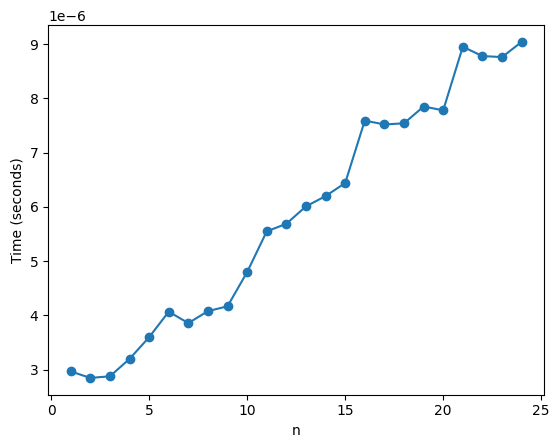

In [87]:
 plot_discrete(my_timeit(Fibonacci))

In [88]:
from functools import lru_cache
@lru_cache
def fibonacci_cached(n):
  return (fibonacci_cached(n-1) + fibonacci_cached(n-2)) if n > 1 else n

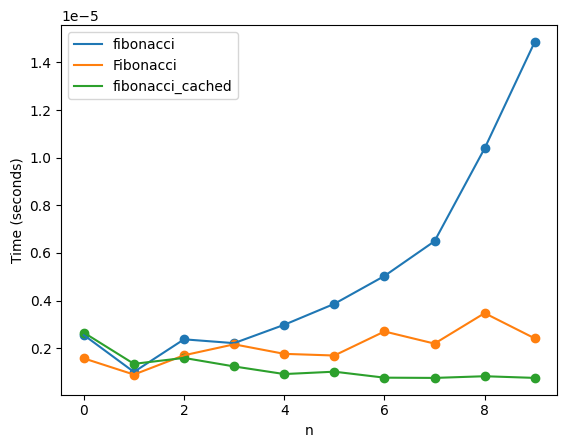

In [89]:
nn = 10
plot_discrete(my_timeit(fibonacci), range(nn))
plot_discrete(my_timeit(Fibonacci), range(nn))
plot_discrete(my_timeit(fibonacci_cached), range(nn))
plt.legend()

## Задание 4
Напишите функцию, производяющую с помощью reduce композицию функций из списка по порядку.
С помощью неё создайте функцию [сигмоиды](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%B3%D0%BC%D0%BE%D0%B8%D0%B4%D0%B0) `1 / (1 + e**(-x))` из
`inc`, `reciprocal`, `negate` и `math.exp`

In [90]:
def inc(x):
  return x + 1
print(inc(1))
reciprocal = lambda x: 1/x
print(reciprocal(2))
negate = lambda x: -x
print(negate(3))

2
0.5
-3


In [98]:
from math import exp
exp(1)

2.718281828459045

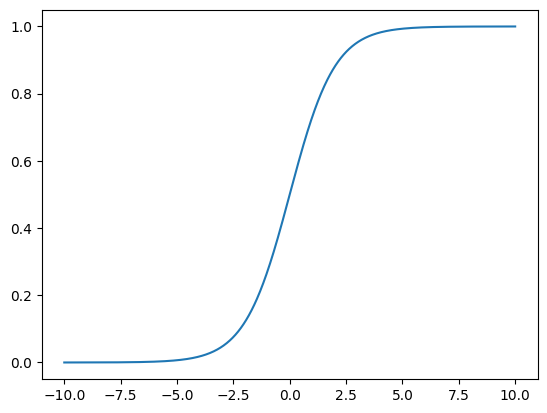

In [101]:
from typing import Callable, List
from functools import reduce
def plot_symmetric(foo):
  x_space = np.linspace(-10, 10, num=1000)
  y = [foo(x) for x in x_space]
  plt.plot(x_space, y)


def compose_all(*functions):
 return reduce(lambda f, g: lambda x: f(g(x)), functions)


sigmoid = compose_all(reciprocal, inc, exp, negate)

plot_symmetric(sigmoid)
plt.show()